### K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Classified_data.csv',index_col=0)
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


#### Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
y = data['TARGET CLASS']
X = data.drop(['TARGET CLASS'],axis=1)

In [6]:
X_scaled = scaler.fit_transform(X)

In [7]:
scaled_data = pd.DataFrame(X_scaled,columns=data.columns[:-1])
scaled_data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


#### Train Test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(scaled_data,y,test_size = 0.30, random_state = 355)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [13]:
y_pred = knn.predict(X_test)

#### Prediction and Evaluation

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [16]:
print("Accuracy for training data:{}".format(knn.score(X_train,y_train)))
print("Accuracy for test data:{}".format(knn.score(X_test,y_test)))
print("Accuracy for test data:{}".format(accuracy_score(y_test,y_pred)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test,y_pred)))
print("Classification Report:\n {}".format(classification_report(y_test,y_pred)))

Accuracy for training data:1.0
Accuracy for test data:0.9266666666666666
Accuracy for test data:0.9266666666666666
Confusion Matrix:
 [[138  11]
 [ 11 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       149
           1       0.93      0.93      0.93       151

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



#### Predicting the K-value

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,scaled_data,y,cv=10)
    accuracy_rate.append(score.mean())
    

In [20]:
#accuracy_rate

In [21]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,scaled_data,y,cv=10)
    error_rate.append(1-score.mean())

In [23]:
#error_rate

Text(0, 0.5, 'Accuracy Rate')

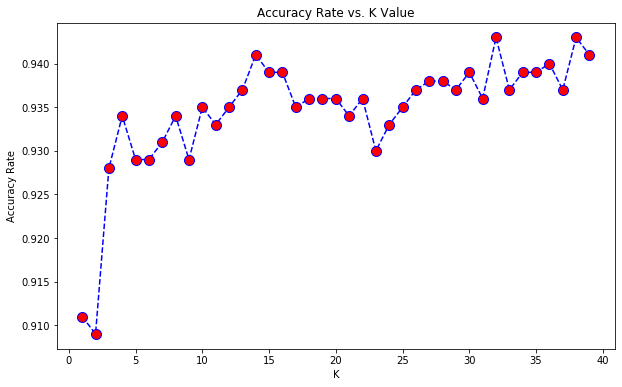

In [26]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Error Rate')

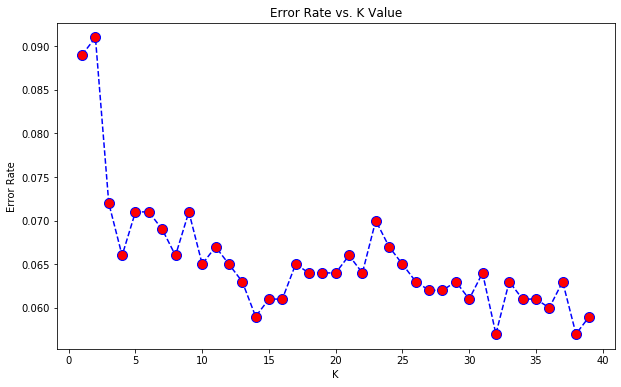

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

#### Now lets choose K = 23 and do the prediction for knn

In [27]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)

In [28]:
print("Accuracy for training data:{}".format(knn.score(X_train,y_train)))
print("Accuracy for test data:{}".format(knn.score(X_test,y_test)))
print("Accuracy for test data:{}".format(accuracy_score(y_test,y_pred1)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test,y_pred1)))
print("Classification Report:\n {}".format(classification_report(y_test,y_pred1)))

Accuracy for training data:0.9314285714285714
Accuracy for test data:0.9466666666666667
Accuracy for test data:0.9466666666666667
Confusion Matrix:
 [[141   8]
 [  8 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       149
           1       0.95      0.95      0.95       151

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



We can see that our precission and recall increases after K = 23.

In [29]:
### Referance:: Krish Naik Youtube video tutorial on Machine Learning